<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/AIProject2CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence**

# **Project 2: Binary Classification on ‘Customer_Churn’using Keras**

### **Problem Statement:**

You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from  churning out to other telecom companies.

### **Customer_churn Dataset:**

The details regarding this ‘customer_churn’ dataset are present in the data dictionary:

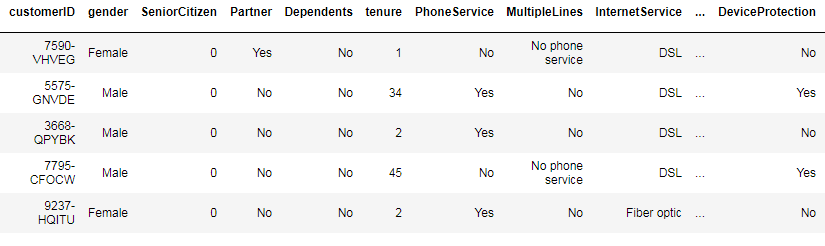

### **Domain:** Telecom

### **Domain Context:**
Customer churn, in simple terms means that the customer has stopped doing business with the company and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive analysis to gauge the factors responsible for a customer to leave the company. These churn prediction
models help in finding out the customer base that are most likely to churn out.
### **Lab Environment:** Jupyter Notebook

### **Tasks to be done:**

**A) Data Manipulation:**

a. Find the total number of male customers

b. Find the total number of customers whose Internet Service is ‘DSL’

c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’

d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’

**B) Data Visualization:**

a. Build a pie-chart to show the distribution of customers would be churning out

b. Build a bar-plot to show the distribution of ‘Internet Service’

**C) Model Building:**

a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

  i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

  ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

  iii. Use ‘Adam’ as the optimization algorithm

  iv. Fit the model on the train set, with number of epochs to be 150

  v. Predict the values on the test set and build a confusion matrix

  vi. Plot the ‘Accuracy vs Epochs’ graph

b. Build the 2nd model using same target and feature variables:

  i. Add a drop-out layer after the input layer with drop-out value of 0.3

  ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

  iii. Predict the values on the test set and build a confusion matrix

  iv. Plot the ‘Accuracy vs Epochs’ graph

c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

  i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

  ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

  iii. Use ‘Adam’ as the optimization algorithm

  iv. Fit the model on the train set, with number of epochs to be 150
  
  v. Predict the values on the test set and build a confusion matrix
  
  vi. Plot the ‘Accuracy vs Epochs’ graph

### **Step 1: Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

In [2]:
!pip install openpyxl

### **Step 2: Dataset loading**

In [3]:
# Load the dataset
df = pd.read_csv('/content/Customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Step 3: A) Data Manipulation**

In [5]:
# a. Find the total number of male customers
male_customers = df[df['gender'] == 'Male'].shape[0]
print(f'Total Male Customers: {male_customers}')

Total Male Customers: 3555


In [11]:
#or
sum(df['gender']=="Male")

3555

In [6]:
# b. Find the total number of customers whose Internet Service is ‘DSL’
dsl_customers = df[df['InternetService'] == 'DSL'].shape[0]
print(f'Total DSL Customers: {dsl_customers}')

Total DSL Customers: 2421


In [7]:
# c. Extract all Female senior citizens whose Payment Method is 'Mailed check'
new_customer1 = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]
print(new_customer1.head())

     customerID  gender  SeniorCitizen Partner Dependents  tenure  \
139  0390-DCFDQ  Female              1     Yes         No       1   
176  2656-FMOKZ  Female              1      No         No      15   
267  3197-ARFOY  Female              1      No         No      19   
451  5760-WRAHC  Female              1      No         No      22   
470  4933-IKULF  Female              1      No         No      17   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
139          Yes            No     Fiber optic                   No  ...   
176          Yes           Yes     Fiber optic                   No  ...   
267          Yes            No     Fiber optic                  Yes  ...   
451          Yes            No             DSL                  Yes  ...   
470          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
139                   No                   No             

In [8]:
# d. Extract all customers whose tenure is less than 10 months or Total charges < $500
# Replace empty strings ' ' in TotalCharges with 0.0
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0.0')

# Convert TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Now we can safely filter the DataFrame.
new_customer2 = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]
print(new_customer2.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
2  3668-QPYBK    Male              0      No         No       2          Yes   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
2                No             DSL            Yes  ...               No   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
7  No phone service             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### **Step 4: B) Data Visualization**

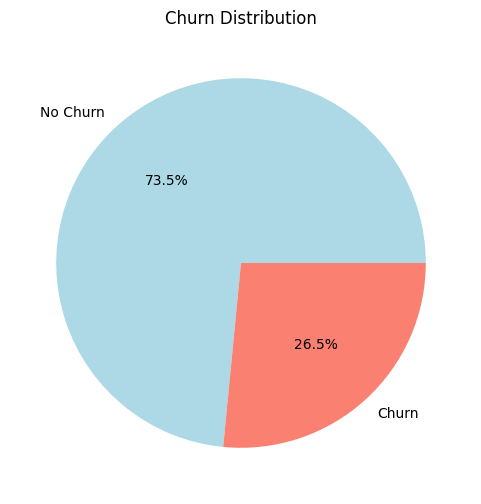

In [9]:
# a. Build a pie-chart to show the distribution of customers who would be churning out
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'], labels=['No Churn', 'Churn'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

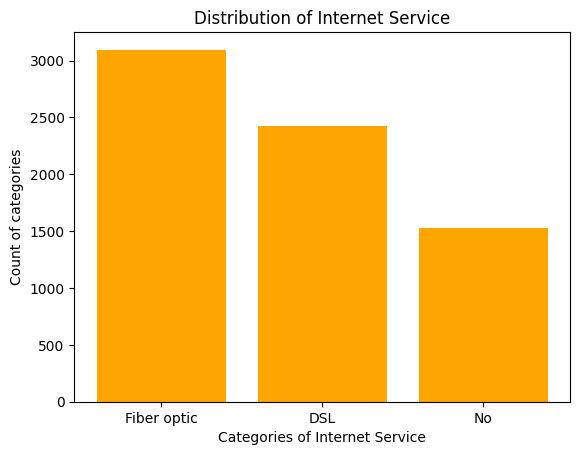

In [10]:
# b. Build a bar-plot to show the distribution of ‘Internet Service’
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='orange')
#We are creating the bar-plot using plt.bar()
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()
#Going ahead, we are assigning the x-label, y-label and title to the plot.

### **Step 5: C) Model Building**

**a) Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:**

i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6107 - loss: 0.6669 - val_accuracy: 0.7353 - val_loss: 0.5284
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.5228 - val_accuracy: 0.7353 - val_loss: 0.5020
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7396 - loss: 0.5186 - val_accuracy: 0.7353 - val_loss: 0.4987
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7286 - loss: 0.5212 - val_accuracy: 0.7566 - val_loss: 0.4977
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7444 - loss: 0.5189 - val_accuracy: 0.7353 - val_loss: 0.5002
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7421 - loss: 0.5196 - val_accuracy: 0.7566 - val_loss: 0.4968
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7457 - loss: 0.5243 - val_accuracy: 0.7566 - val_loss: 0.4972
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7494 - loss: 0.5131 - val_accu

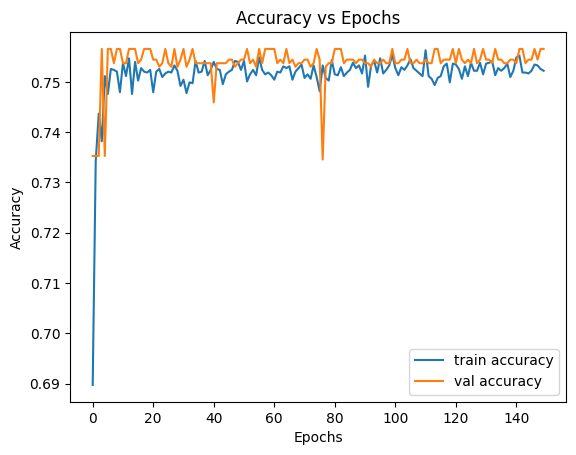

In [12]:
# Prepare the dataset
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert target to binary
df = df[['tenure', 'Churn']].dropna()
X = df[['tenure']]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the first sequential model
model = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype('int32')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot Accuracy vs Epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()


**b. Build the 2nd model using same target and feature variables:**

i. Add a drop-out layer after the input layer with drop-out value of 0.3

ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

iii. Predict the values on the test set and build a confusion matrix

iv. Plot the ‘Accuracy vs Epochs’ graph

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6944 - loss: 0.6279 - val_accuracy: 0.7353 - val_loss: 0.5171
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7272 - loss: 0.5514 - val_accuracy: 0.7353 - val_loss: 0.5064
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7318 - loss: 0.5396 - val_accuracy: 0.7353 - val_loss: 0.5039
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7347 - loss: 0.5274 - val_accuracy: 0.7353 - val_loss: 0.5018
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7433 - loss: 0.5262 - val_accuracy: 0.7353 - val_loss: 0.5017
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7307 - loss: 0.5260 - val_accuracy: 0.7353 - val_loss: 0.5005
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7337 - loss: 0.5281 - val_accuracy: 0.7353 - val_loss: 0.4993
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7414 - loss: 0.5234 - val_accuracy: 0.735

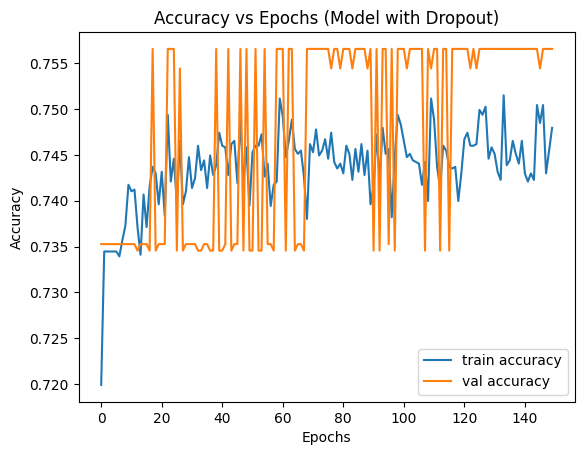

In [14]:
# Build the second sequential model with dropout layers
model2 = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred2 = (model2.predict(X_test) > 0.5).astype('int32')
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print(f'Confusion Matrix:\n{conf_matrix2}')
print(f'Accuracy: {accuracy_score(y_test, y_pred2)}')

# Plot Accuracy vs Epochs
plt.plot(history2.history['accuracy'], label='train accuracy')
plt.plot(history2.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs (Model with Dropout)')
plt.show()

**c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ &‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:**

i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

In [18]:
# Prepare the dataset
df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].dropna()
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the third sequential model with multiple features
model3 = Sequential([
    Dense(12, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred3 = (model3.predict(X_test) > 0.5).astype('int32')
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print(f'Confusion Matrix:\n{conf_matrix3}')
print(f'Accuracy: {accuracy_score(y_test, y_pred3)}')

# Plot Accuracy vs Epochs
plt.plot(history3.history['accuracy'], label='train accuracy')
plt.plot(history3.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs (Model with Multiple Features)')
plt.show()


KeyError: "['MonthlyCharges', 'TotalCharges'] not in index"

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5521 - loss: 0.6906 - val_accuracy: 0.7977 - val_loss: 0.4922
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7787 - loss: 0.4937 - val_accuracy: 0.7942 - val_loss: 0.4460
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7833 - loss: 0.4645 - val_accuracy: 0.8013 - val_loss: 0.4364
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7795 - loss: 0.4630 - val_accuracy: 0.7999 - val_loss: 0.4343
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7820 - loss: 0.4568 - val_accuracy: 0.7999 - val_loss: 0.4318
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7868 - loss: 0.4535 - val_accuracy: 0.7899 - val_loss: 0.4305
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7878 - loss: 0.4517 - val_accuracy: 0.8006 - val_loss: 0.4290
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7913 - loss: 0.4472 - val_accuracy: 0.8006

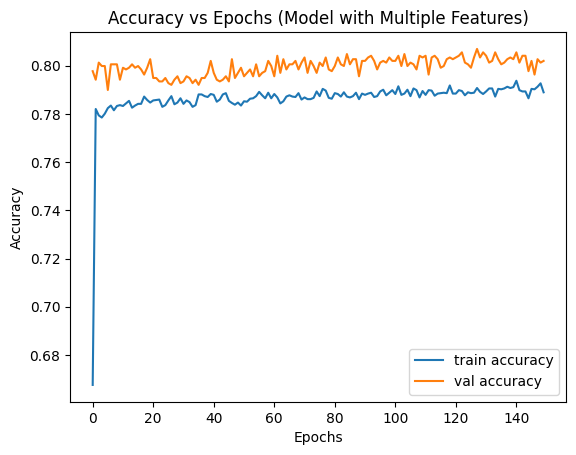

In [19]:
# Load the dataset again for model c)
df = pd.read_csv('/content/Customer_churn.csv')
# d. Extract all customers whose tenure is less than 10 months or Total charges < $500
# Replace empty strings ' ' in TotalCharges with 0.0
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0.0')

# Convert TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].astype(float)
# Prepare the dataset for model c)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].dropna()
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the third sequential model with multiple features
model3 = Sequential([
    Dense(12, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred3 = (model3.predict(X_test) > 0.5).astype('int32')
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print(f'Confusion Matrix:\n{conf_matrix3}')
print(f'Accuracy: {accuracy_score(y_test, y_pred3)}')

# Plot Accuracy vs Epochs
plt.plot(history3.history['accuracy'], label='train accuracy')
plt.plot(history3.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs (Model with Multiple Features)')
plt.show()